In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [4]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt

    # data = datasets.load_digits()
    data = pd.read_csv("/content/IRIS.csv")


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = data.drop(['species'],axis = 1)
y = data['species']

# Project the data onto the 2 primary principal components
pca = PCA(3)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

Shape of X: (150, 4)
Shape of transformed X: (150, 3)


<ipython-input-7-b28556c3706a>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y_encoded, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


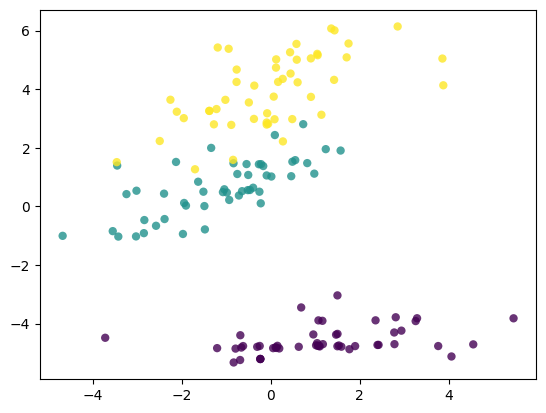

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert species names to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now use y_encoded for the color mapping
plt.scatter(
    x1, x2, c=y_encoded, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

<ipython-input-8-efd164f2d90b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y_encoded, edgecolor="none", alpha=0.8, cmap=cm.get_cmap("viridis", 3)


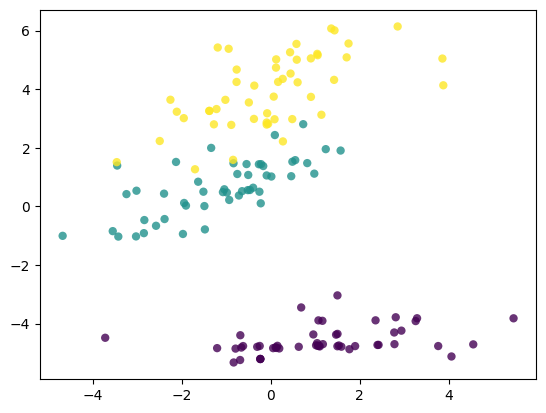

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(
    x1, x2, c=y_encoded, edgecolor="none", alpha=0.8, cmap=cm.get_cmap("viridis", 3)
)